# Librería VISUALIZACIÓN

##### Importaciones

In [1]:
import warnings
#warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import squarify
import phik


In [2]:
# Cargamos dataset de suicidios
suic_df = pd.read_csv("suicide.csv")

# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("titanic.csv", sep="\t")

# Cargamos los datos del supermarket sales
market_df = pd.read_csv("supermarket_sales.csv")

autism_df = pd.read_csv("Autism_todos_raw_data_csv.csv", sep = ";")


In [3]:
autism_df


,A1_score,A2_score,A3_score,A4_score,A5_score,A6_score,A7_score,A8_score,A9_score,A10_score,...,sex,ethnicity,jaundice,fam_history_PDD,country_of_res,used_app_before,age_num,age_desc,relation,class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,26.0,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,24.0,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,27.0,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,35.0,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,40.0,'18 and more',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,'United Kingdom',no,7.0,'4-11 years',Parent,YES
1096,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,7.0,'4-11 years',Parent,NO
1097,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,4.0,'4-11 years',Parent,YES
1098,1,1,1,0,1,1,1,1,1,1,...,m,'South Asian',no,no,India,no,4.0,'4-11 years',Parent,YES


In [4]:
len(autism_df["country_of_res"].unique())

89

In [5]:
autism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_score         1100 non-null   int64  
 1   A2_score         1100 non-null   int64  
 2   A3_score         1100 non-null   int64  
 3   A4_score         1100 non-null   int64  
 4   A5_score         1100 non-null   int64  
 5   A6_score         1100 non-null   int64  
 6   A7_score         1100 non-null   int64  
 7   A8_score         1100 non-null   int64  
 8   A9_score         1100 non-null   int64  
 9   A10_score        1100 non-null   int64  
 10  screening_score  1100 non-null   int64  
 11  sex              1100 non-null   object 
 12  ethnicity        956 non-null    object 
 13  jaundice         1100 non-null   object 
 14  fam_history_PDD  1100 non-null   object 
 15  country_of_res   1100 non-null   object 
 16  used_app_before  1100 non-null   object 
 17  age_num       

### Análisis de una única variable

In [6]:
def univariant(df,col_1,palette = ["#0879B1","#A61D39", "#92d7f6", "#d1979a"],kde = False, boxplot = False, rotation = False,xlabel = False):
    
    """       
    Function that graphically displays one numerical or categorical variable through a distplot/boxplot and a countplot, respectively.
    
    Arguments:
    
     - df: dataframe.
     - col_1: dataframe column (i.e. series) that contains the numeric or categorical variable to be displayed. 
     - boxplot: False by default. If scatter is informed as True, the function displays a boxplot instead of a histogram. Disperson can only be used with numeric variables.
     - rotation: It takes None by default. If rotation is informed as True, the labels for x values are displayed with a 45 º rotation.
     - kde: kde refers to Kernel Density Estimate, which is used for visualizing the probability density of a continuous variable.It takes None by default.
     - palette: The palette by default is the following list: ["#0879B1","#A61D39", "#92d7f6", "#d1979a"], it can be changed by any Seaborn palette.
     - xlabel: False by default. It is used to define the xlabel. It must be introduced as a string.
      
    """   
  
    %config InlineBackend.figure_format = 'retina'
    sns.set(style='white');   
              
    if type(col_1[0]) == str or len(np.unique(col_1)) <= 2:  
        
        if len(np.unique(col_1)) <= 5:    
            plt.figure(figsize=(7,5))
                       
        elif len(np.unique(col_1)) <= 30:
            plt.figure(figsize=(12,5))
            sns.set(font_scale = 0.8,style='white')
            
        else:
            plt.figure(figsize=(20,5))
            sns.set(font_scale = 0.8,style='white')
            plt.xticks(rotation = 90)
 
        fig = sns.countplot(x = col_1,
                                palette = palette)   
    else:       
        plt.figure(figsize=(10,8));
        if boxplot:
            fig =sns.boxplot(x = col_1, color = "#A61D39");
        
        else:
            fig= sns.displot(col_1, kde = kde, color = "#A61D39",height = 6, aspect = 1.5); 
           
    plt.ylabel("Count")
    
    if rotation:
        plt.xticks(rotation = 45);
    
    if xlabel:
        plt.xlabel(xlabel)
   
    return fig;


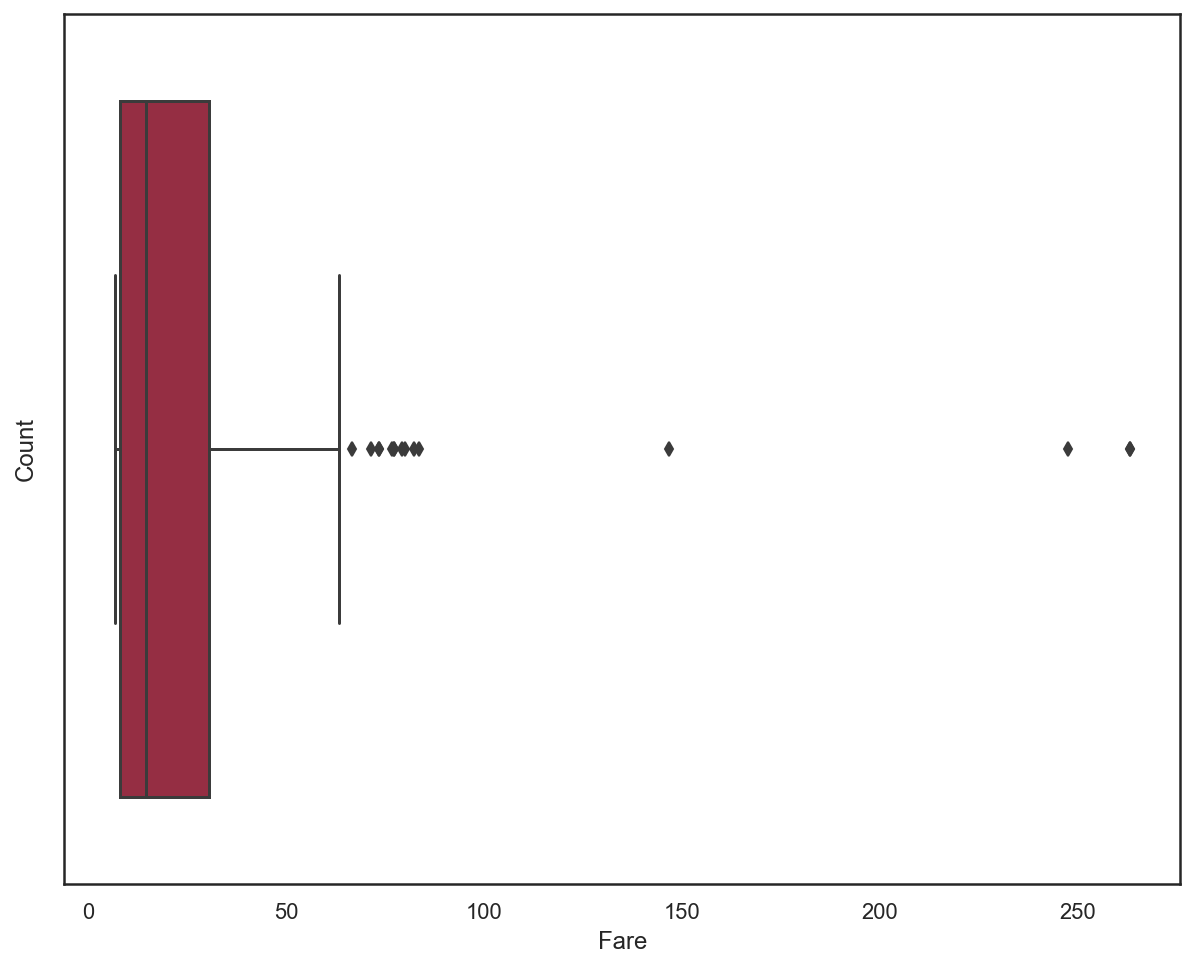

In [7]:
univariant(titanic_df,titanic_df["Fare"],kde= True,palette = "rocket", boxplot = True);

In [8]:
autism_df["relation"].unique()

autism_df = autism_df.dropna(subset = ["relation","ethnicity"])
autism_df["relation"]

0         Self
1         Self
2       Parent
3         Self
5         Self
         ...  
1095    Parent
1096    Parent
1097    Parent
1098    Parent
1099    Parent
Name: relation, Length: 956, dtype: object

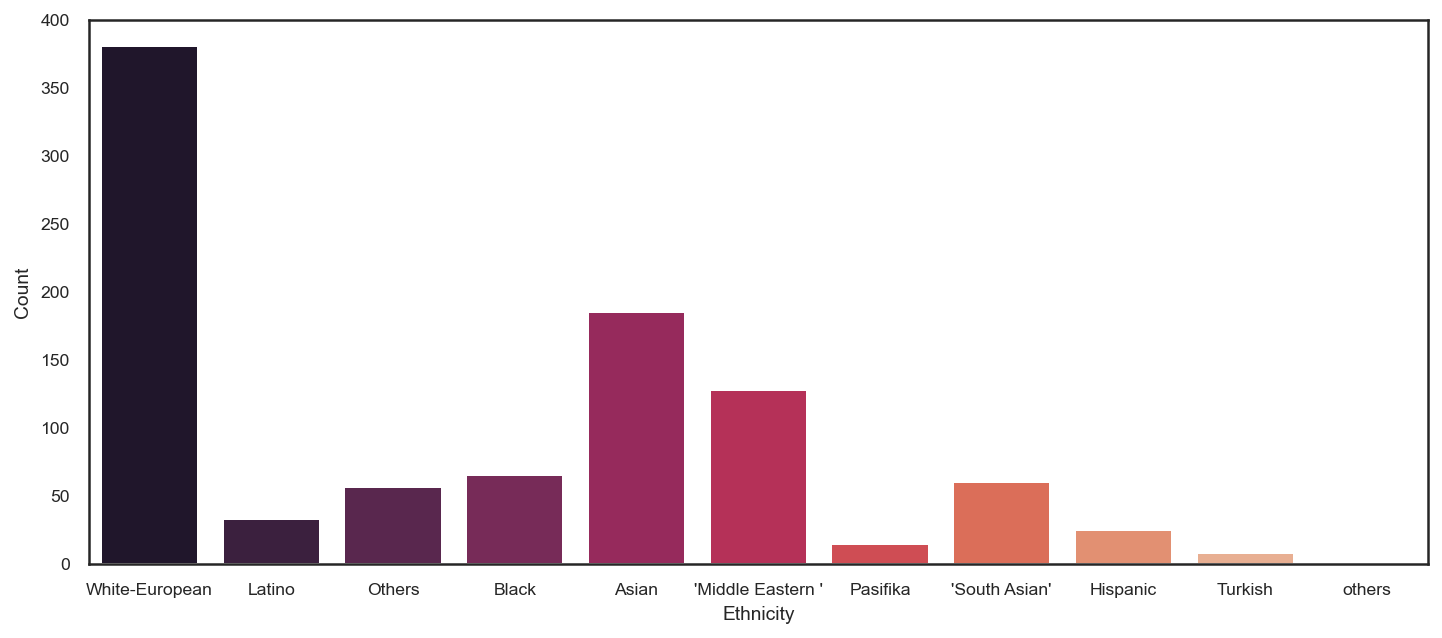

In [10]:
univariant(autism_df,autism_df["ethnicity"],palette = "rocket", xlabel = "Ethnicity");

In [ ]:
univariant(autism_df,autism_df["age_desc"],kde=True,rotation = True,palette = "rocket",xlabel = "Age description")

In [ ]:
univariant(titanic_df,titanic_df["Fare"],kde = True);

### Análisis de dos variables

In [13]:
def bivariant_num(df,col_1,col_2,color = ["#A61D39"],xlabel = False, ylabel = False):
    
    """
    Function that graphically displays two numeric variables through a scatterplot.
    
    Arguments:
    
     - df: dataframe.
     - col_1: dataframe column (i.e. series) containing the numeric variable to be displayed on the x axis.
     - col_2: dataframe column (i.e. series) containing the numeric variable to be displayed on the y axis.
     - color: the color by default is "#0879B1".
     - xlabel: False by default. It is used to define the xlabel. It must be introduced as a string.
     - ylabel: False by default. It is used to define the ylabel. It must be introduced as a string.
    """

    %config InlineBackend.figure_format = 'retina'        
    sns.set(style='white');            
    
    plt.figure(figsize=(10,9));
    
    fig = sns.scatterplot(x=col_1,
            y=col_2, 
            color = color);    
    
    if xlabel:
        plt.xlabel(xlabel)
        
    if ylabel:
        plt.ylabel(ylabel)
           
    return fig;

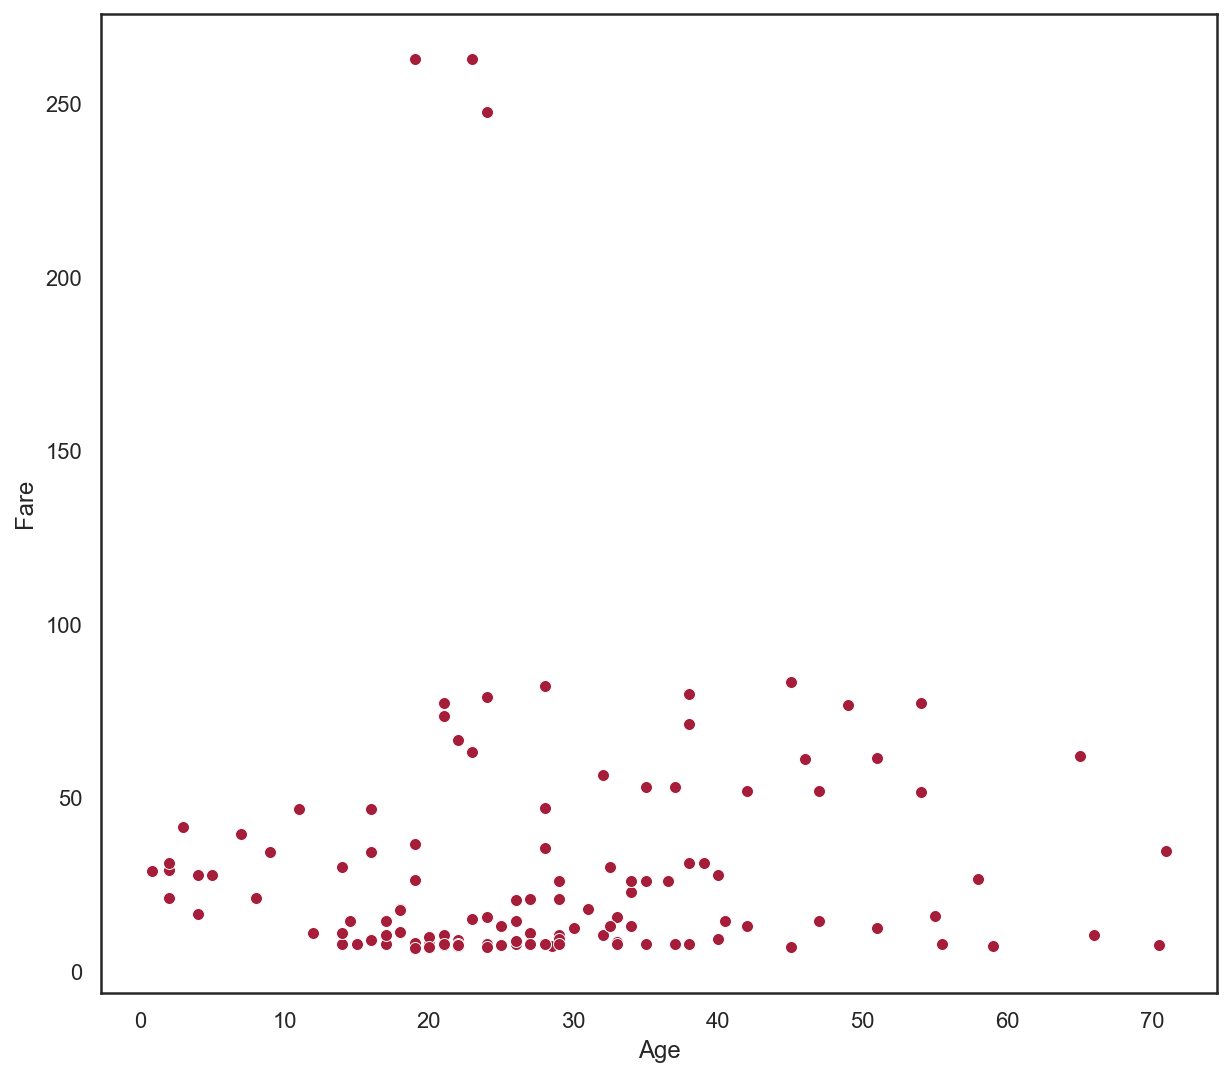

In [14]:
bivariant_num(titanic_df,titanic_df["Age"],titanic_df["Fare"],xlabel= "Age", ylabel = "Fare");

In [24]:
def bivariant_cat(df,col_1,col_2,rotation = None,palette = "rocket",xlabel = False, ylabel = False):
    
    """
    Function that graphically displays two categorical or binary variables through a catplot.
    
    The values of the first variable are displayed on the x-axis as bars, with a count of values on the y-axis. The second variable 2 is displayed through the different colors of the bars.
    
    Arguments:
    
     - df: T dataframe.
     - col_1: dataframe column (i.e. series) containing the categorical variable to be displayed in the form of bars.
     - col_2: dataframe column (i.e. series) containing the categorical variable to be displayed through the color of the bars.
     - rotation: It takes None by default. If rotation is informed as True, the labels for x values are displayed with a 45 º rotation.
     - palette: the palette by default is "rocket".
     - xlabel: False by default. It is used to define the xlabel. It must be introduced as a string.
     - ylabel: False by default. It is used to define the ylabel. It must be introduced as a string.
     
    """
   
    %config InlineBackend.figure_format = 'retina';  

    name_cat = col_1.name
    name_hue = col_2.name
    forzar_rotacion = False

             
    if len(col_1.unique()) > 20 or len(col_2.unique()) > 20:           
        height = 5
        aspect = 3
        forzar_rotacion = True
                
    else: 
        height = 6
        aspect = 1.3
      
    plt.figure(figsize=(15,10));     
    sns.set(style='white');        
    fig = sns.catplot(x = name_cat,
            hue = name_hue,
            kind = "count",
            edgecolor = ".6",
            data = df,
            palette = palette,
            height = height, 
            aspect = aspect);    
   
    if rotation == True:
        plt.xticks(rotation = 45);
        
    elif forzar_rotacion == True:
        plt.xticks(rotation = 90)
        sns.set(font_scale = 0.8)
        
    if xlabel:
        plt.xlabel(xlabel)
        
    if ylabel:
        plt.ylabel(ylabel)  
        
    return fig;

In [29]:

def bivariant_cat(df,col_1,col_2,rotation = None,palette = "rocket",xlabel = False, ylabel = False):
    
    """
    Function that graphically displays two categorical or binary variables through a catplot.
    
    The values of the first variable are displayed on the x-axis as bars, with a count of values on the y-axis. The second variable 2 is displayed through the different colors of the bars.
    
    Arguments:
    
     - df: T dataframe.
     - col_1: dataframe column (i.e. series) containing the categorical variable to be displayed in the form of bars.
     - col_2: dataframe column (i.e. series) containing the categorical variable to be displayed through the color of the bars.
     - rotation: It takes None by default. If rotation is informed as True, the labels for x values are displayed with a 45 º rotation.
     - palette: the palette by default is "rocket".
     - xlabel: False by default. It is used to define the xlabel. It must be introduced as a string.
     - ylabel: False by default. It is used to define the ylabel. It must be introduced as a string.
     
    """
   
    %config InlineBackend.figure_format = 'retina';  

    name_cat = col_1.name
    name_hue = col_2.name
    forzar_rotacion = False

             
    if len(col_1.unique()) > 20 or len(col_2.unique()) > 20:           
        height = 5
        aspect = 3
        forzar_rotacion = True
        #print("entro  en el primer if")
        
    else: 
        height = 6
        aspect = 1.3
      
    plt.figure(figsize=(15,10));     
    sns.set(style='white');        
    fig = sns.catplot(x = name_cat,
            hue = name_hue,
            kind = "count",
            edgecolor = ".6",
            data = df,
            palette = palette,
            height = height, 
            aspect = aspect);    
   
    if forzar_rotacion == True:
        plt.xticks(rotation = 90)
        sns.set(font_scale = 0.8)
    
    elif rotation == True:
        plt.xticks(rotation = 45)        
       
        
    if xlabel:
        plt.xlabel(xlabel)
        
    if ylabel:
        plt.ylabel(ylabel)  
        
    return fig;

<Figure size 1080x720 with 0 Axes>

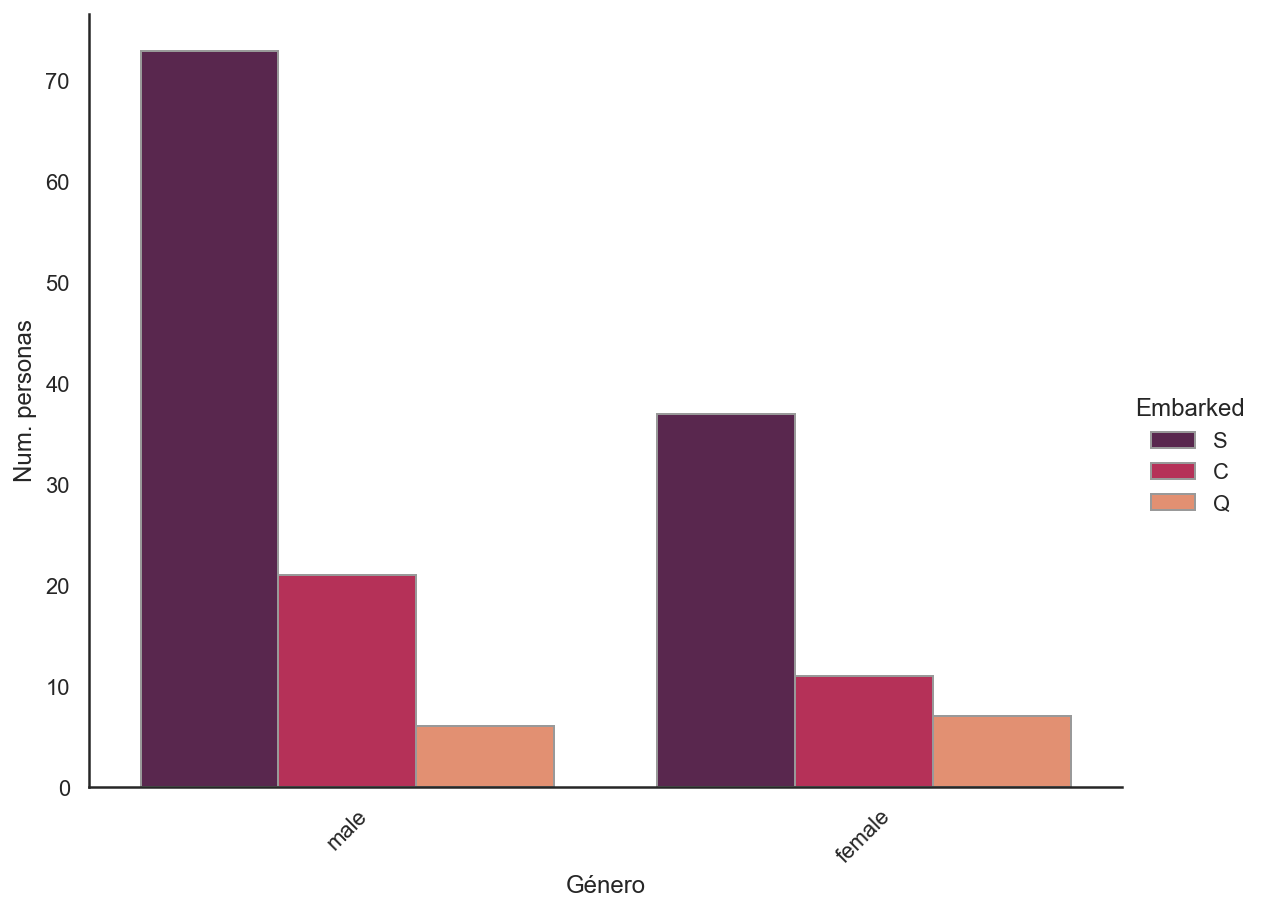

In [21]:
bivariant_cat(titanic_df,titanic_df["Sex"],titanic_df["Embarked"], xlabel = "Género", ylabel = "Num. personas", rotation = True);

<Figure size 1080x720 with 0 Axes>

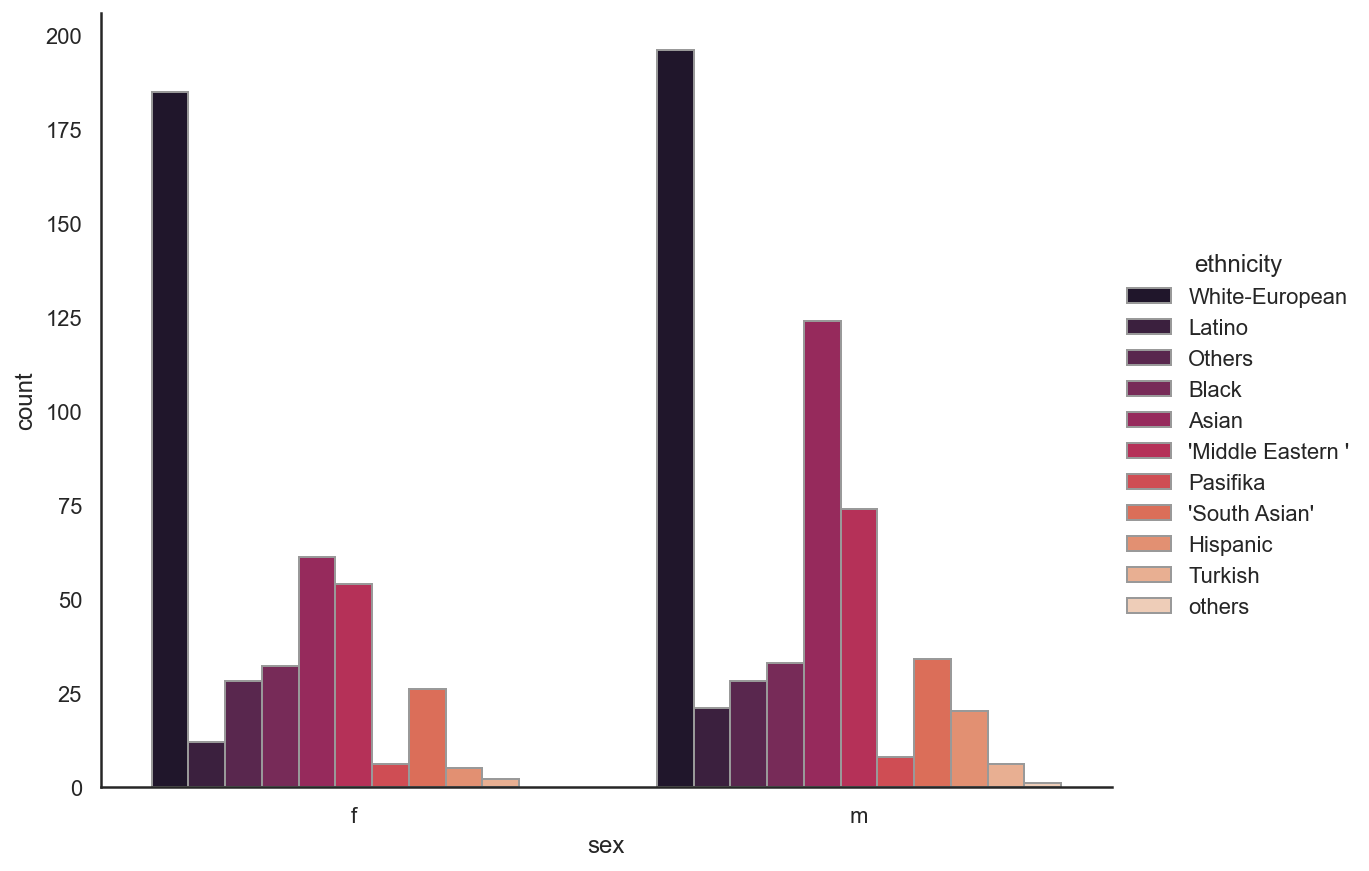

In [22]:
bivariant_cat(autism_df,autism_df["sex"],autism_df["ethnicity"],palette = "rocket");

<Figure size 1080x720 with 0 Axes>

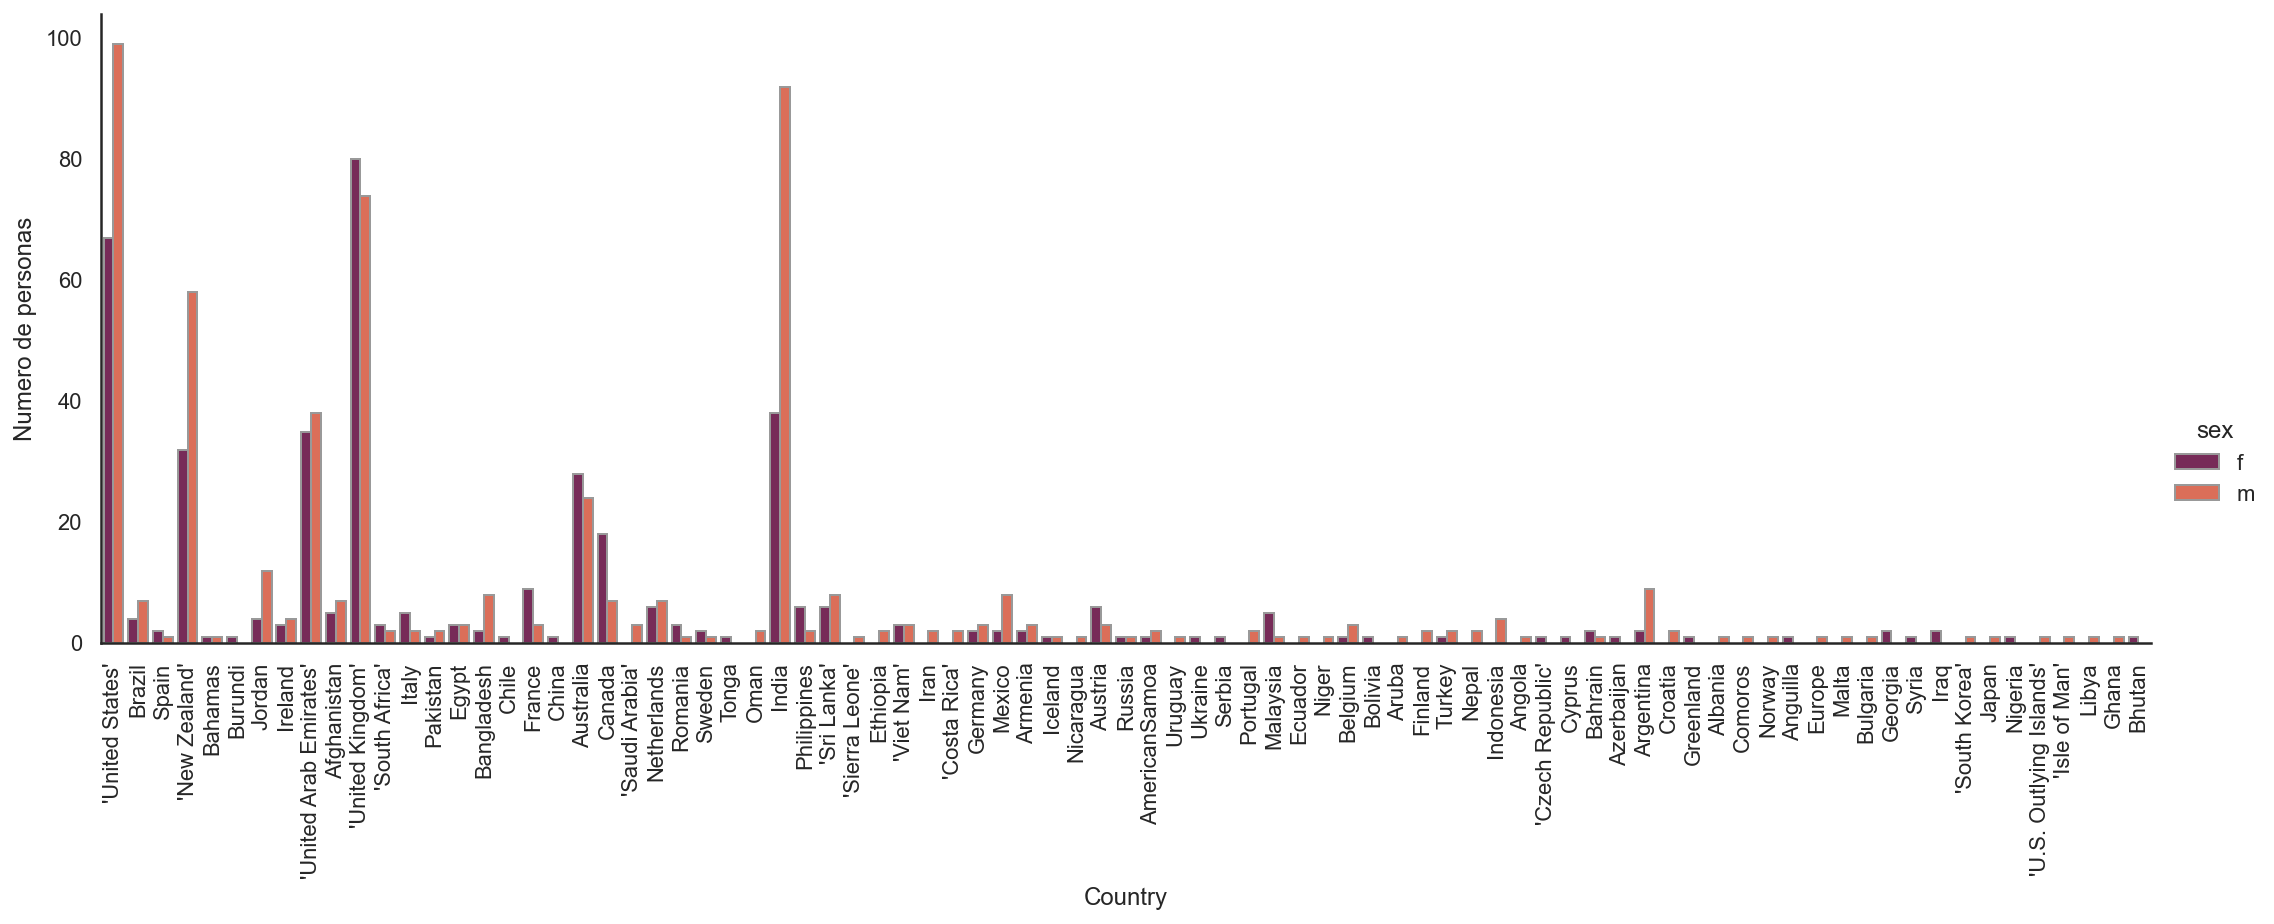

In [31]:
bivariant_cat(autism_df,autism_df["country_of_res"],autism_df["sex"],rotation = True, xlabel = "Country", ylabel = "Numero de personas");

In [32]:
def bivariant_cat_num(df,col_1,col_2):
    
    """
   Function that graphically displays the combination of a categorical and a numeric variable through a treeplot.
    
    Arguments:
    
     - df: dataframe.
     - col_1: dataframe column (i.e. series) containing the categorical variable.
     - col_2: dataframe column (i.e. series) containing the numerical variable.
     -  palette: the palette by default is "rocket".
            
    """  
    name_1 = col_1.name
    name_2 = col_2.name
     
    plt.figure(figsize=(15,10));
    sns.set(style='white');   
    plt.axis = ("off");
     
    if (type(col_1[0]) == str or len(col_1.unique()) <= 2) and type(col_2[0]) != str:
        
        data = df.groupby(name_1).sum()[name_2].sort_values(ascending=False)
                #la primera es la categórica y la segunda la numérica. 
                #Es decir, se agrupa por la categórica y se suman el numero de valores en cada grupo, luego se añade la columna numérica.

        cmap = matplotlib.cm.RdBu
        mini=min(data.values)
        maxi=max(data.values)
        norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
        colors = [cmap(norm(value)) for value in data.values]


        fig = squarify.plot(sizes = data.values, 
                              label = data.index, 
                              alpha = .8,
                                color=colors);

        return fig;

        
    elif (type(col_2[0]) == str or len(col_2.unique()) <= 2) and type(col_1[0]) != str:         
       
        data = df.groupby(name_2).sum()[name_1].sort_values(ascending=False)
        
        cmap = matplotlib.cm.RdBu
        mini=min(data.values)
        maxi=max(data.values)
        norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
        colors = [cmap(norm(value)) for value in data.values]

        fig = squarify.plot(sizes = data.values, 
                          label = data.index, 
                          alpha = .8,
                            color=colors);
            
        return fig;
    
    else: 
         print("The 'bivariant_cat_num' function only admit one categorical variable and one numerical variable.Please review the kind of variables informed.")            
    

<AxesSubplot:>

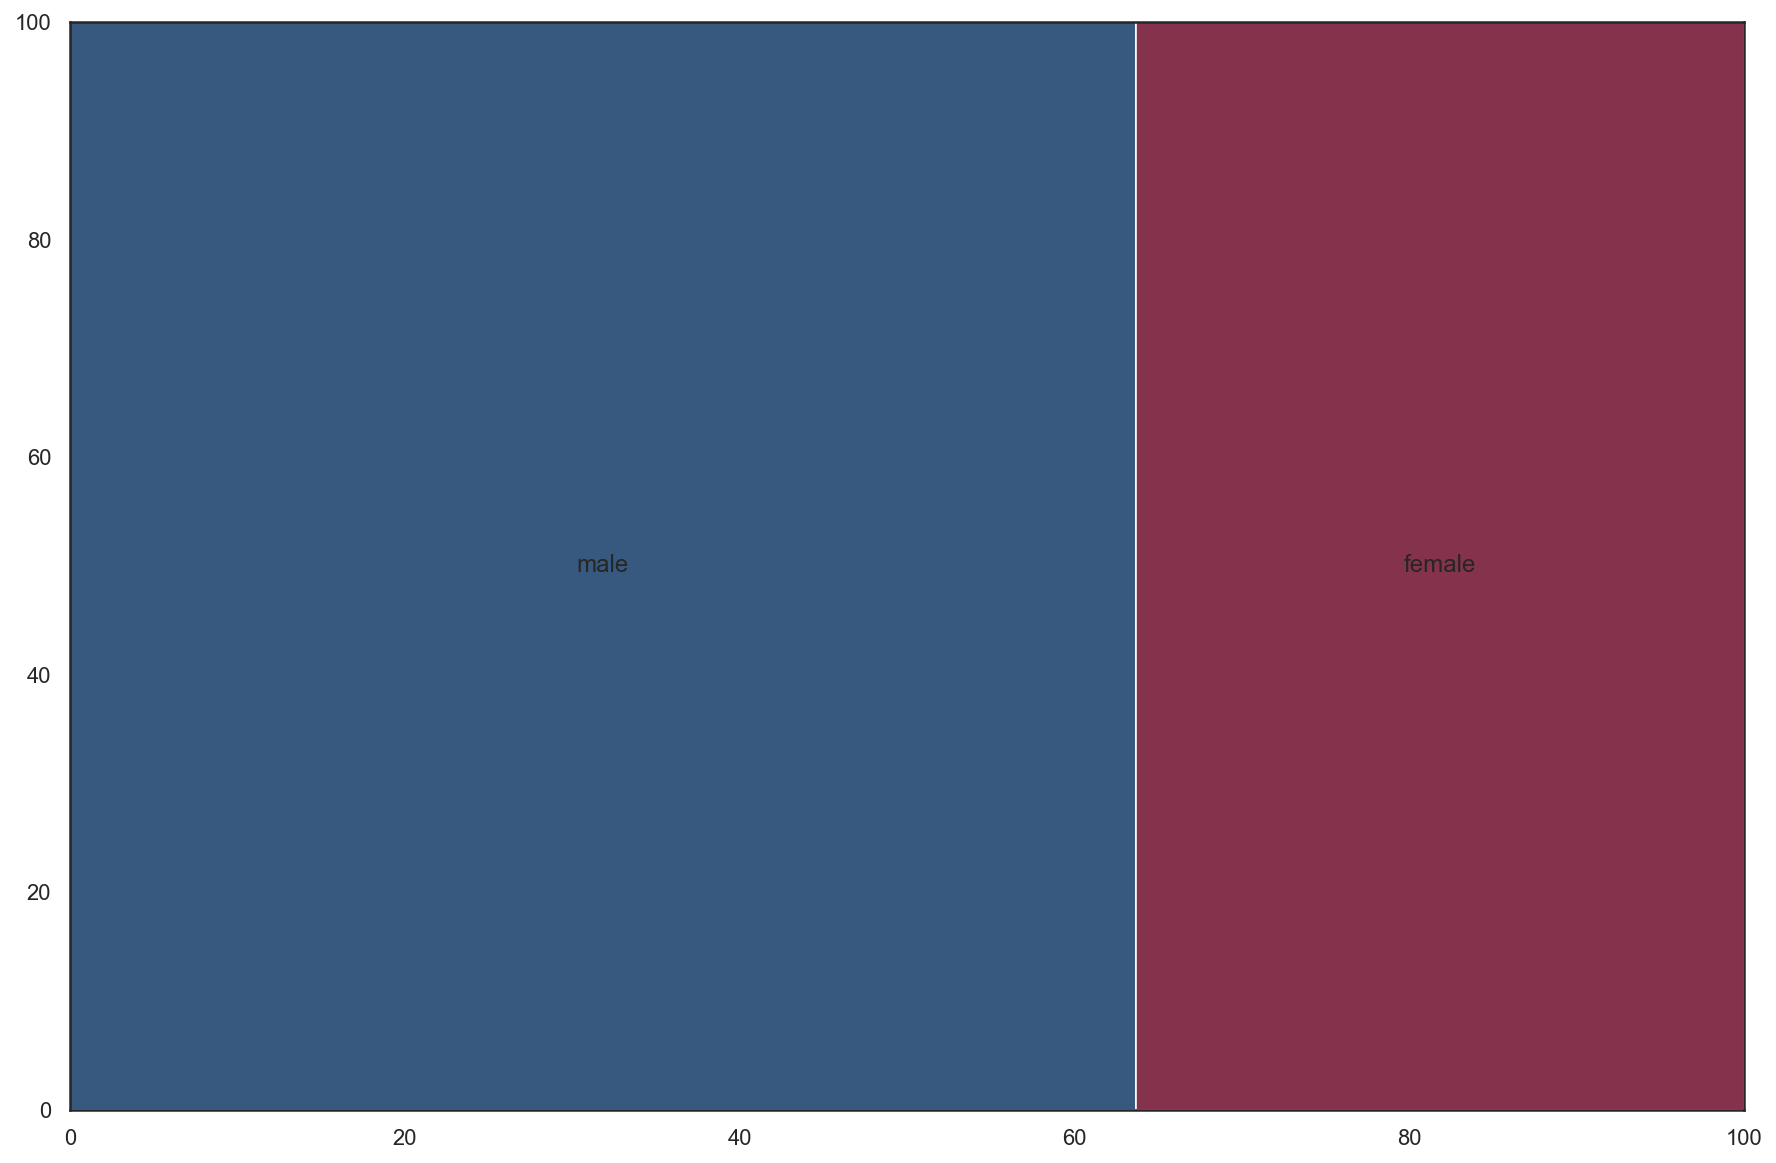

In [33]:
bivariant_cat_num(titanic_df,titanic_df["Sex"],titanic_df["Fare"])

In [ ]:
bivariant_cat_num(autism_df,autism_df["country_of_res"],autism_df["screening_score"]);


In [ ]:
bivariant_cat_num(titanic_df,titanic_df["Fare"],titanic_df["Embarked"]);

In [ ]:
bivariant_cat(autism_df,autism_df["sex"],autism_df["ethnicity"],palette = "cubehelix");

### Función selectora para el análisis bivariante.
##### Esta función se ha creado para ser utilizada desde la función overview, aunque tambien puede ser utilizada directamente para trabajar con dos variables.

In [34]:
def bivariant_all(df,col_1,col_2,rotation = None,color = "#A61D39",palette = "rocket",xlabel = False, ylabel = False):
    
    """
    This function shows the relation between two numeric variables through the most appropiate plot depending on the type of variables informed.
    It has been created to be called from the overview function, but can be used independently.
        
        - Two numeric variables are displayed through a scatterplot.
        - Two categorical variables are displayed through a catplot.
        - A categorical and a numeric variable are displayed through a treeplot.        
               
    Arguments:
    
    - df : dataframe.
    - col_1 : dataframe column (i.e. series) containing the first variable to be plotted. 
    - col_2 : dataframe column (i.e. series) containing the second variable to be plotted.
    - rotation: It takes None by default. If rotation is informed as True, the labels for x values are displayed with a 45 º rotation.
    - color: The color to be displayed by the scatterplot when two numeric variables are provided. Color is red ("#A61D39") by default.
    - palette: the palette by default is "rocket".
    - xlabel: False by default. It is used to define the xlabel. It must be introduced as a string.
    - ylabel: False by default. It is used to define the ylabel. It must be introduced as a string.
            
    """ 
   
    if (type(col_1[0]) == str and type(col_2[0]) == str) or (len(col_1.unique()) <= 2 and type(col_2[0]) == str) or (len(col_2.unique())  <= 2 and type(col_1[0]) == str) or (len(col_1.unique()) <= 2 and len(col_2.unique()) <= 2):
        fig = bivariant_cat(df,col_1,col_2,rotation = rotation,palette = palette,xlabel = xlabel, ylabel = ylabel)
        return fig;

    elif type(col_1[0]) != str and type(col_2[0]) != str:
            
        if (len(col_1.unique()) <= 2 or len(col_2.unique()) <= 2):
            fig = bivariant_cat_num(df,col_1,col_2)  
            return fig;
        else:
            fig = bivariant_num(df,col_1,col_2,color = color,xlabel = xlabel, ylabel = ylabel)
            return fig;
    else: 
        fig = bivariant_cat_num(df,col_1,col_2)
        return fig;

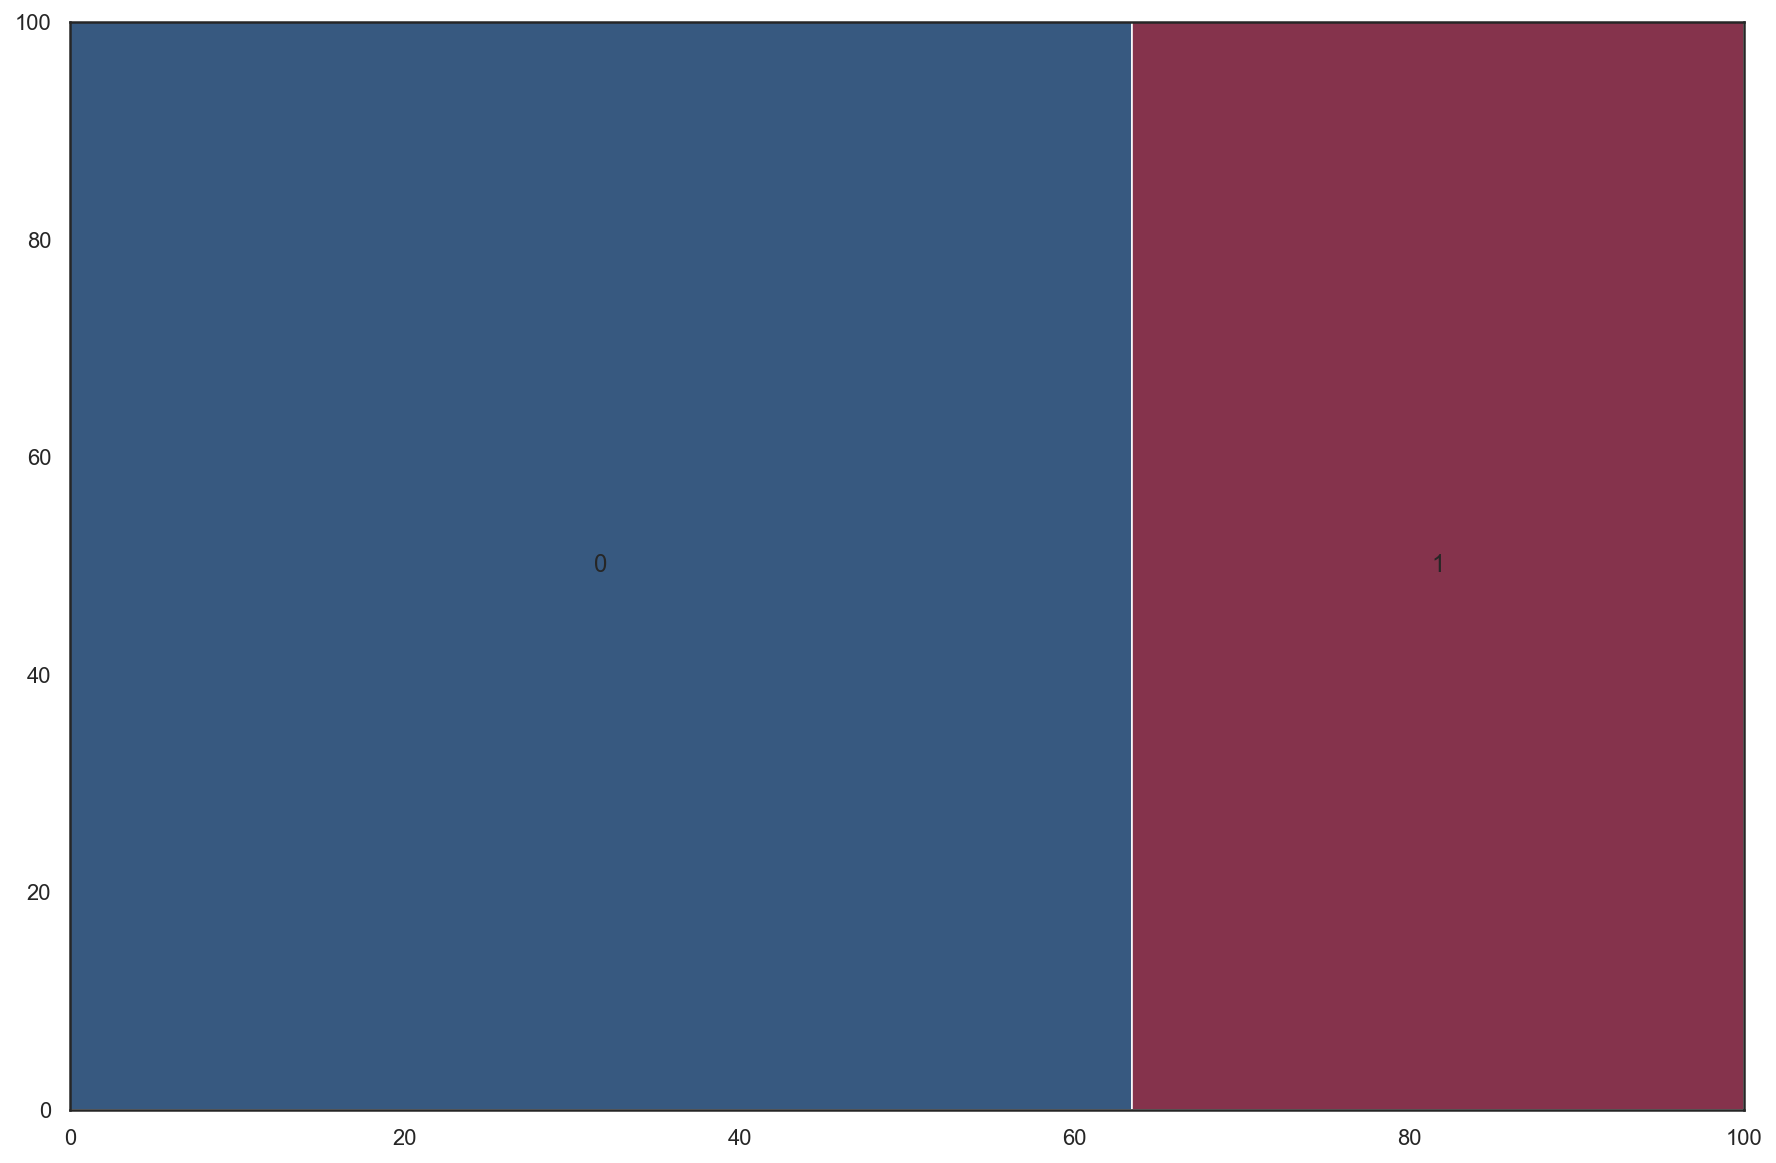

In [36]:
bivariant_all(titanic_df,titanic_df["Fare"],titanic_df["Survived"],palette= "viridis", xlabel = "Fare");

<Figure size 1080x720 with 0 Axes>

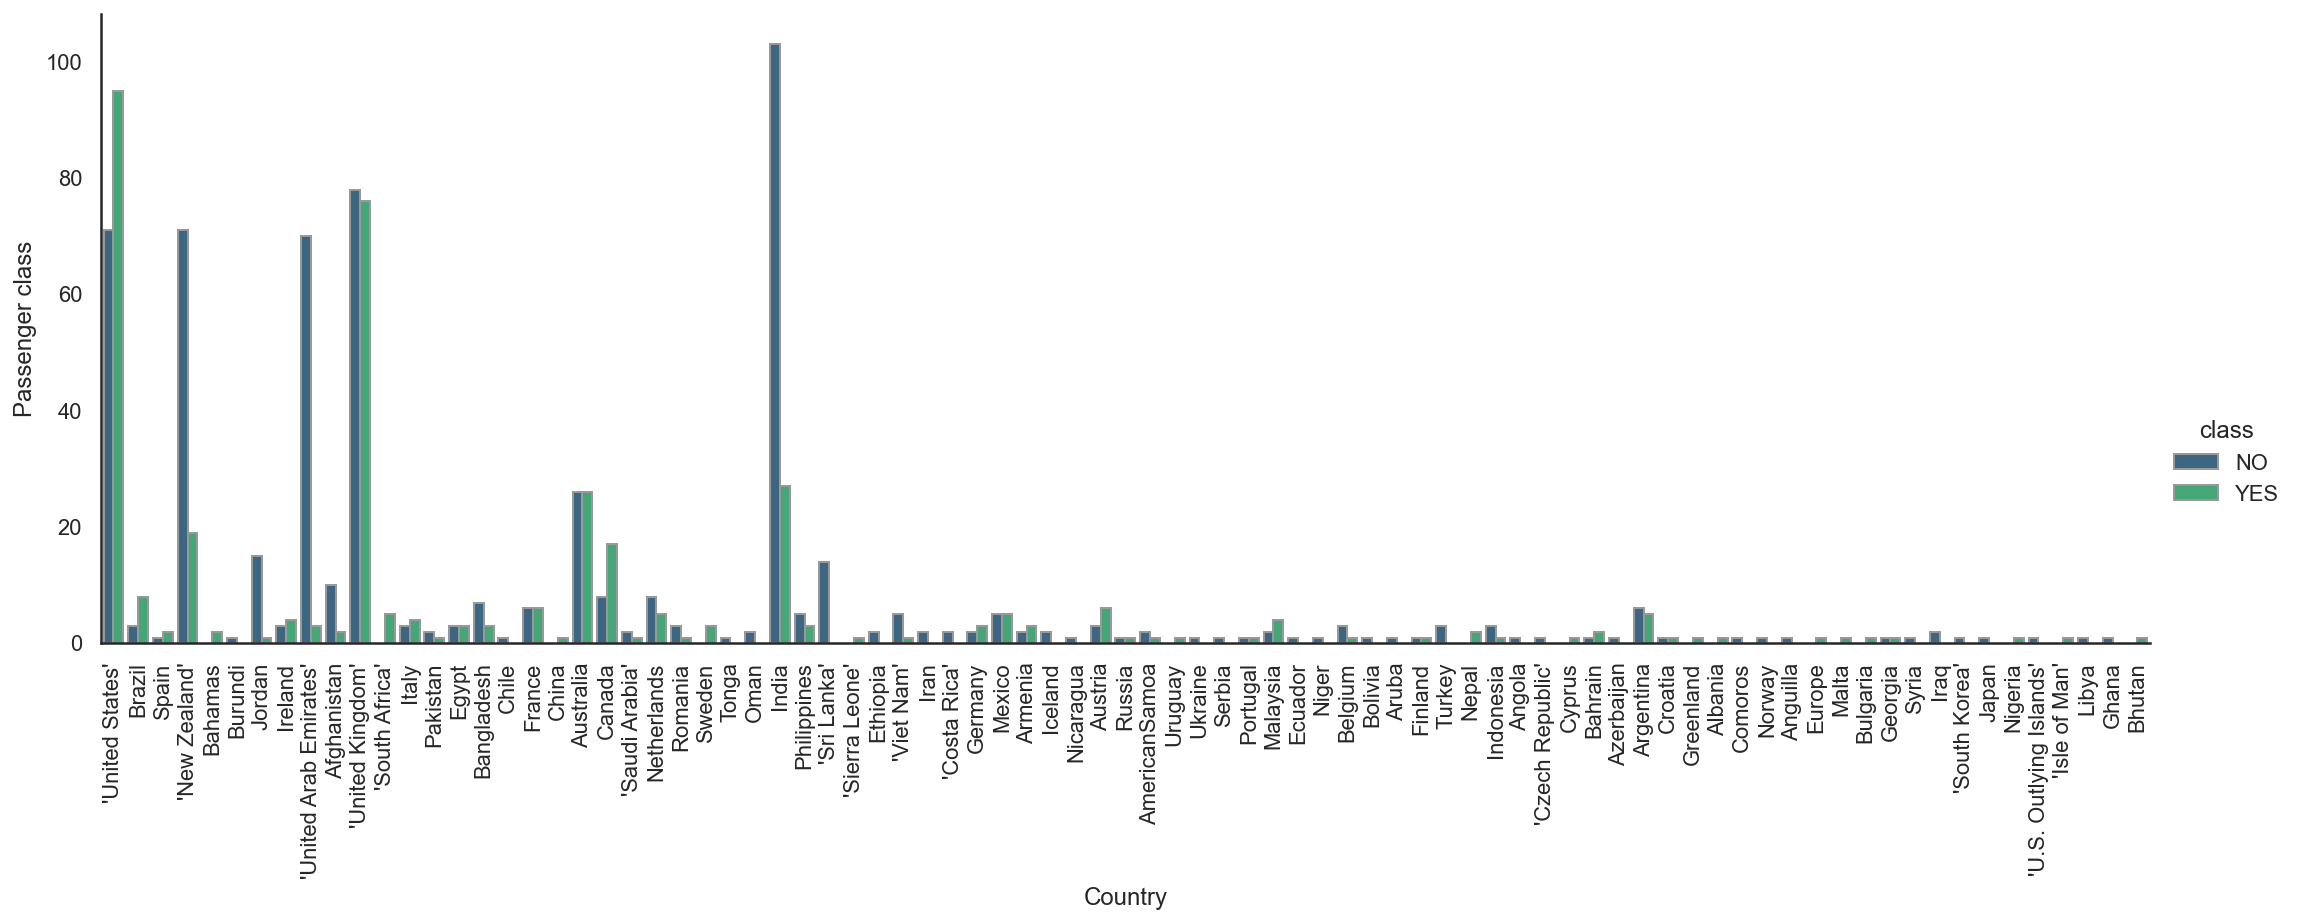

In [37]:
bivariant_all(autism_df,autism_df["country_of_res"],autism_df["class"],palette= "viridis", xlabel = "Country", ylabel = "Passenger class");

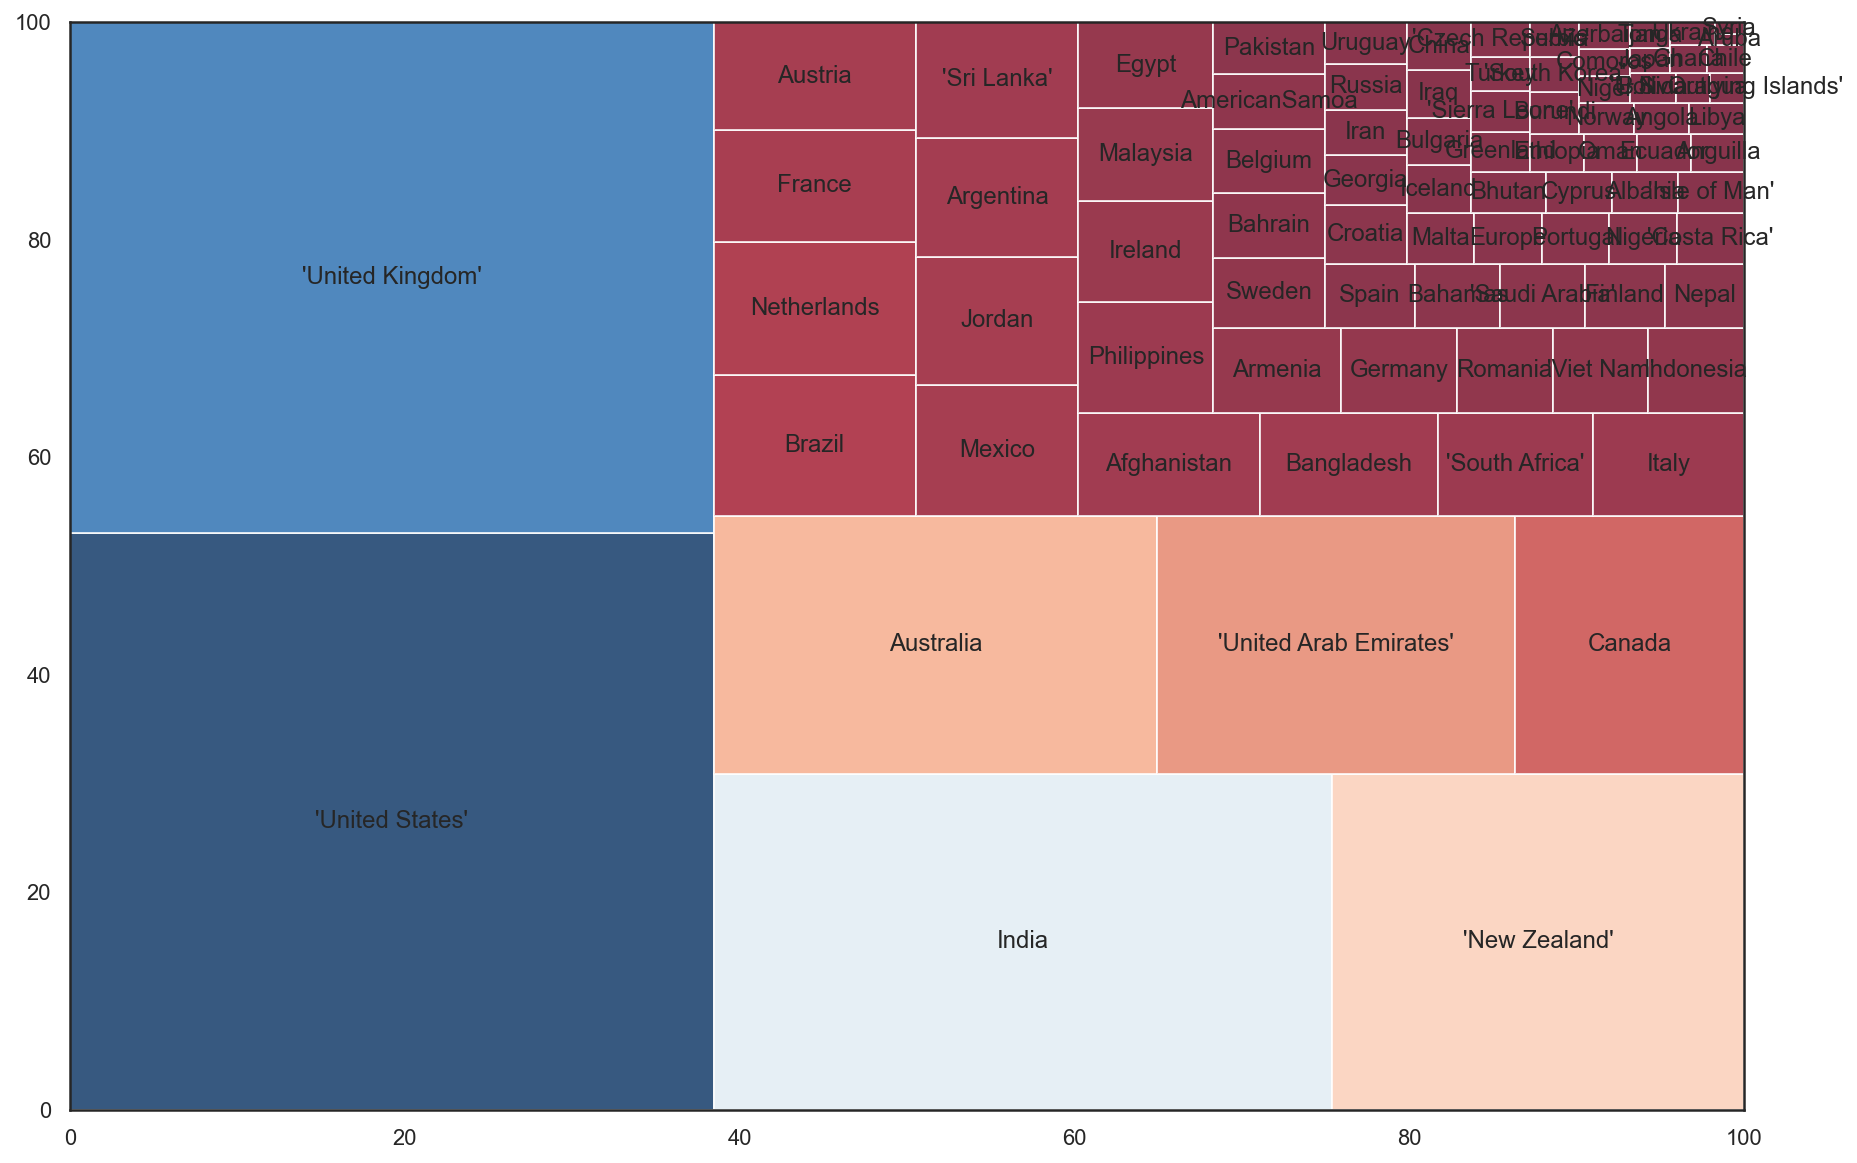

In [38]:
bivariant_all(autism_df,autism_df["country_of_res"],autism_df["screening_score"],xlabel = "Country", ylabel = "Score");

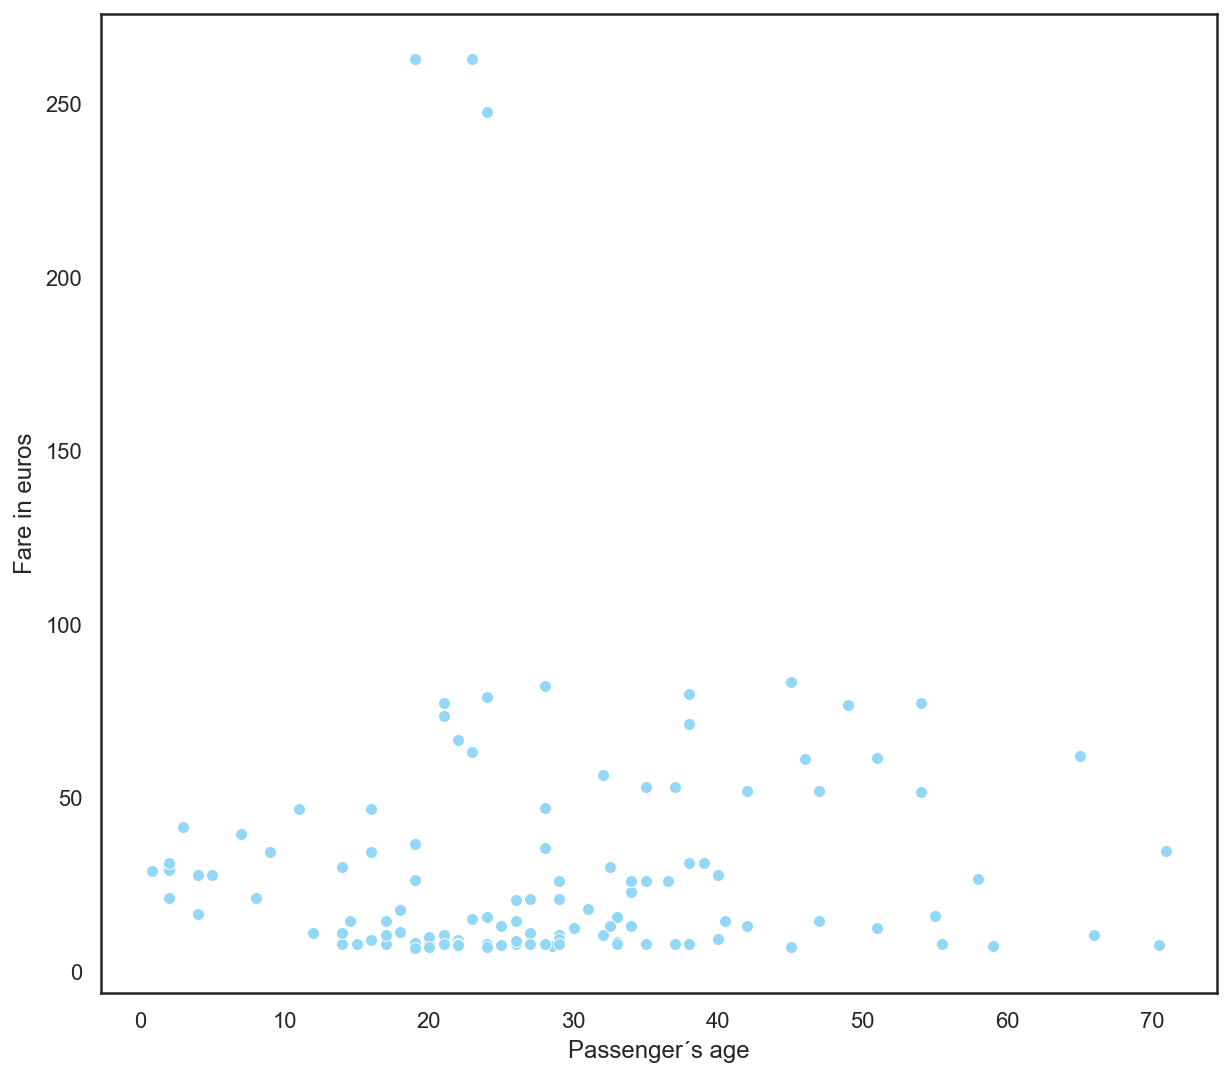

In [40]:
bivariant_all(titanic_df,titanic_df['Age'],titanic_df['Fare'], color = "#92d7f6", xlabel = "Passenger´s age", ylabel = "Fare in euros");

### Análisis de tres variables 
#### Dos variables numéricas como x e y, una tercera variable categórica o binaria como hue.

In [44]:
def trivariant_num(df,col_1,col_2, hue = None,rotation = None,palette = "rocket",xlabel = False, ylabel = False):
    
    """
    This function shows the relation between three variables through a scatterplot.  
    It only admits two numerical variables as x and y and a third categorical or binary variable as hue.
    
    Arguments:
    
    - df: dataframe.
    - col_1: dataframe column (i.e. series) containing the numeric variable to be displayed on the x axis.
    - col_2: dataframe column (i.e. series) containing the numeric variable to be displayed on the y axis.
    - hue: dataframe column´s name (i.e. string). Refers to the variable to be displayed through the colors of the scatterplot´s points, which 
    be a categorical or binary variable. Hue takes None by default.
    - rotation: It takes None by default. If rotation is informed as True, the labels for x values are displayed with a 45 º rotation. 
    - palette: the palette by default is "rocket".
    - xlabel: False by default. It is used to define the xlabel. It must be introduced as a string.
    - ylabel: False by default. It is used to define the ylabel. It must be introduced as a string.
    
    """  
    
    %config InlineBackend.figure_format = 'retina' 
    plt.figure(figsize=(10,9));
    sns.set(style='white');
    try: 
        
        if rotation == True:
            plt.xticks(rotation =  45);
        
        fig = sns.scatterplot(x=col_1,
                    y=col_2, 
                    hue = df[hue], 
                    palette = palette)  
        
        if xlabel:
            plt.xlabel(xlabel)
        
        if ylabel:
            plt.ylabel(ylabel)          
        
        return fig;
    
    except:
        print("Error. Note that the trivariant graphic (i.e. three' kind of graphic) only admits two numerical variables as x and y, and a third categorical or binary variable as hue.");   
    

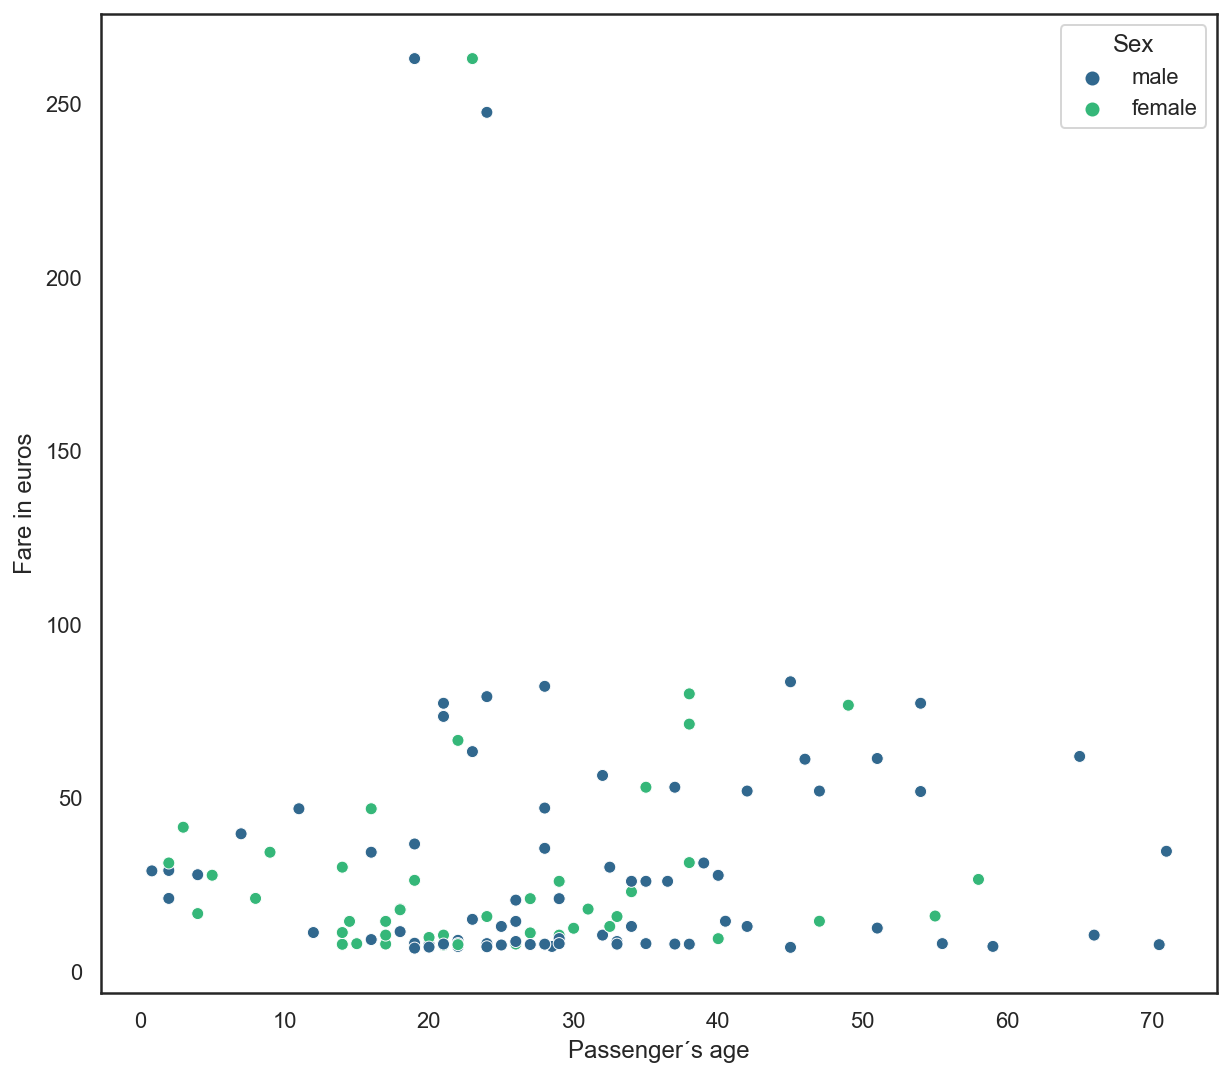

In [45]:
trivariant_num(titanic_df,titanic_df['Age'],titanic_df['Fare'], hue = "Sex", palette = "viridis", xlabel = "Passenger´s age", ylabel = "Fare in euros");

In [ ]:
trivariant_num(titanic_df,titanic_df["Embarked"], titanic_df["Fare"],hue ='Survived');

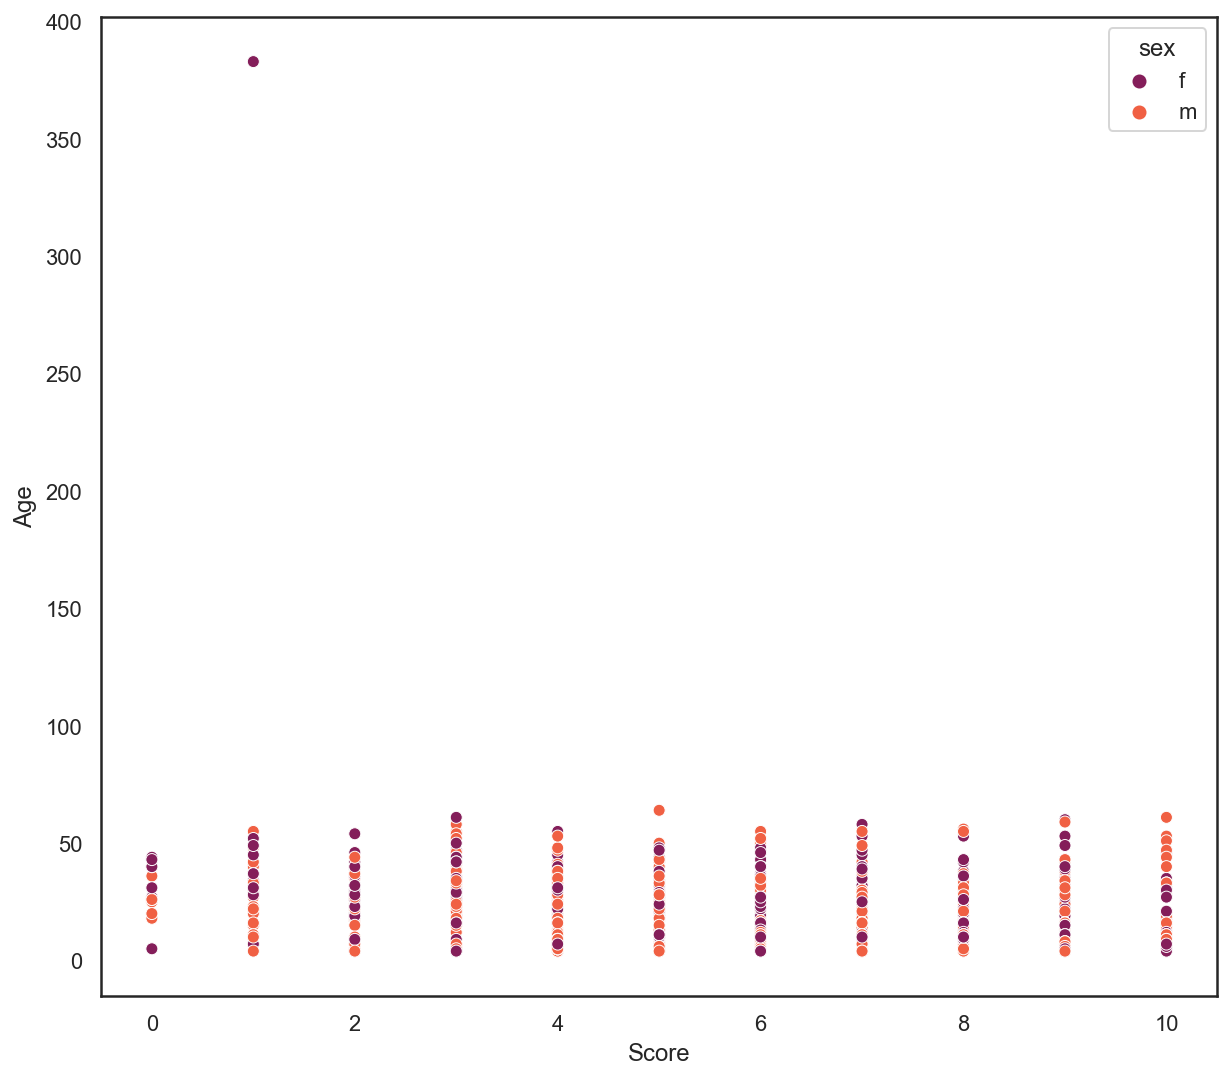

In [46]:
trivariant_num(autism_df,autism_df["screening_score"],autism_df["age_num"],hue="sex",xlabel = "Score", ylabel = "Age");

### Matriz de correlación

In [47]:
def phik_matrix_simple(df,nuevo_cmap=False):
    '''
    This function creates a Phik Matrix
    
    Params:
            - df = Dataframe
    
    '''  
    palette = ['#0879b1', '#FFFFFF', '#a61d39']
    size_matrix = (10, 10)
    cbar = True
    cbar_orientacion = 'vertical',
    annot = True

    phik_matrix = df.phik_matrix()

    fig, ax = plt.subplots(figsize=size_matrix)

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", palette)
    
    if nuevo_cmap != False:
        cmap=nuevo_cmap
    
    heatmap = sns.heatmap(phik_matrix,
                          vmin = -1,
                          vmax = 1,
                          center = 0,
                          cbar=cbar,
                          cmap=cmap,
                          annot=annot,
                        square=True)
                          #nnot_kws={"size": dim_labels})

    plt.title('Phik Matrix') #fontsize=dim_title, pad=20)
    plt.xticks(rotation =  45)

    plt.show()

### Función OVERVIEW (univariante, bivariante, trivariant y matriz correlación)

In [52]:
def overview(df,col_1= None,col_2 = None, hue = None, boxplot = False,kde = False, rotation = False,color = "#A61D39",palette = "rocket",nuevo_cmap = False, xlabel = False, ylabel = False):
    
    """  
    1. Description
    
    Function that graphically displays up to three variables through through the most appropiate kind of plot depending on the variables provided, as well as a Phick
    matrix in case that a whole dataframe is provided.
    
    - One numerical varible is displayed through a through a displot or a boxplot, if the argument boxplot is introduced.
    - One categorical variable is displayed through a countplot.
    - Two numeric variables are displayed through a scatterplot.
    - Two categorical variables are displayed through a catplot.
    - A categorical and a numeric variable are displayed through a treeplot.   
    - The relation between three variables is displayed through a scatterplot. The third variable is introduced as hue and must be a categorical or binary variable.
    - If a whole dataframe is provided, the function displays a Phick matrix for all variables in the dataframe.    
    
    2. Funtions used
    
    The overview function uses the following functions from this same library. 
    Please refer to their corresponding documentation for more clarification.
    
    - univariant
    - bivariant_num
    - bivariant_cat
    - bivariant_cat_num
    - bivariant_all
    - trivariant_num
    - phik_matrix_simple    
    
     
   3. Arguments
    
    - df: dataframe.
    - col_1:  dataframe´s column (i.e. series) containing the fist variable.
    - col_2: dataframe´s column (i.e. series) containing the second variable.
    - hue: dataframe´s column (i.e. string)containig a third variable to be displayed through the colors of the scatterplot´s points, which 
        be a categorical or binary variable. Hue takes None by default.
    - boxplot = It takes None by default. If scatter is informed as True, the function displays a boxplot instead of a histogram. This argument only works for type "one" plotting functions 
         and numeric variables.
    - kde = kde stands for Kernel Density Estimate, which is used for visualizing the probability density of a continuous variable.It takes None by default.
    - rotation = It takes None by default. If rotation is informed as True, the labels for x values are displayed with a 45 º rotation.
    - target: the name of the target´s colum. If informed as True, the function plots the correlation matrix of all variables (accumulated) with
        the target. It takes None by default.
    - color: The color to be displayed by the scatterplot when two numeric variables are provided. Color is red ("#A61D39") by default.
    - palette: the palette by default is "rocket".
    - nuevo_cmap: this argument is used to change the Phick matrix´s colormap by default. Example: nuevo_cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
    - xlabel: False by default. It is used to define the xlabel. It must be introduced as a string.
    - ylabel: False by default. It is used to define the ylabel. It must be introduced as a string.
   
   """
    
    try:
       
        if type(hue) == str:
            print("Visualization of the relation between three variables")
            fig = trivariant_num(df,col_1,col_2, hue = hue,rotation = rotation,palette = palette,xlabel = xlabel, ylabel = ylabel)
            return fig;

        else:
            
            if  type(col_2) == pd.core.series.Series:
                print("Visualization of the relation between two variables")
                fig = bivariant_all(df,col_1,col_2,rotation = rotation, color = color,palette = palette,xlabel = xlabel, ylabel = ylabel)
                return fig;            
            
            else:                
                
                if type(col_1) == pd.core.series.Series:
                    print("Visualization of one variable")
                    fig = univariant(df,col_1, kde = kde, boxplot = boxplot,rotation = rotation,xlabel = xlabel)
                    return fig;
                
                else:
                    print("Visualization of a Phick matrix")
                    fig = phik_matrix_simple(df,nuevo_cmap=nuevo_cmap)
                    return fig
   
    except:        
        print("The function has not been able to properly produce the figure. Please review the variables informed and check the Pythoneer library´s documentation for additional clarification")
    

Visualization of a Phick matrix
interval columns not set, guessing: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


C:\Users\julia\anaconda3\lib\site-packages\phik\data_quality.py:55: UserWarning: The number of unique values of variable Name is very large: 156. Are you sure this is not an interval variable? Analysis for pairs of variables including Name might be slow.
  warnings.warn(
C:\Users\julia\anaconda3\lib\site-packages\phik\data_quality.py:55: UserWarning: The number of unique values of variable Ticket is very large: 145. Are you sure this is not an interval variable? Analysis for pairs of variables including Ticket might be slow.
  warnings.warn(


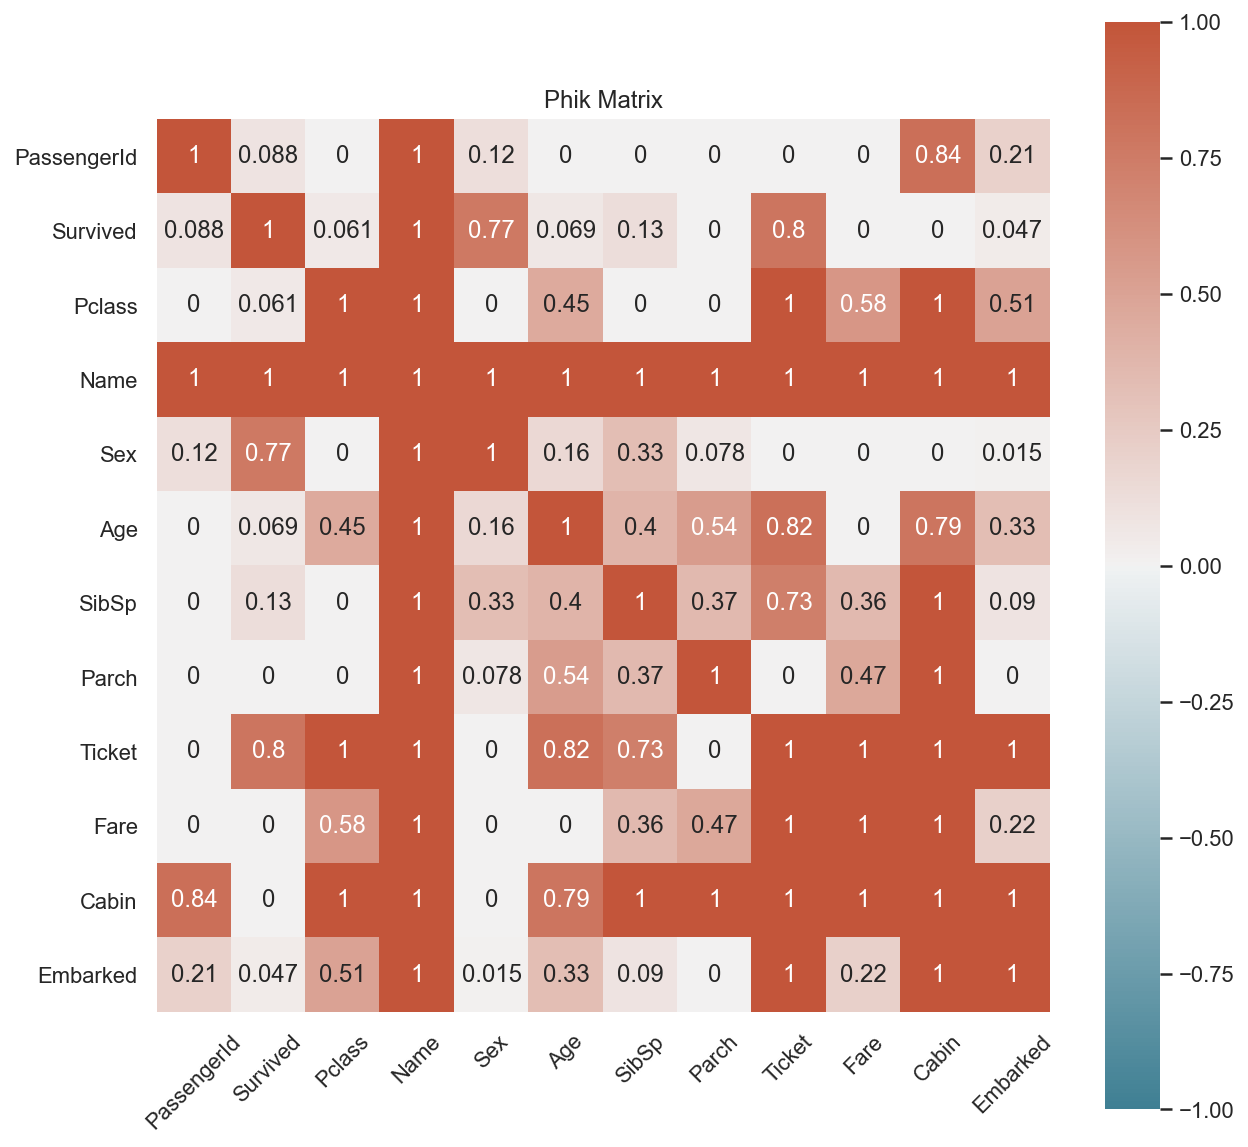

In [49]:
overview(titanic_df, nuevo_cmap = sns.diverging_palette(220, 20, as_cmap=True),xlabel = "Age", ylabel = "Fare"); 

Visualization of one variable


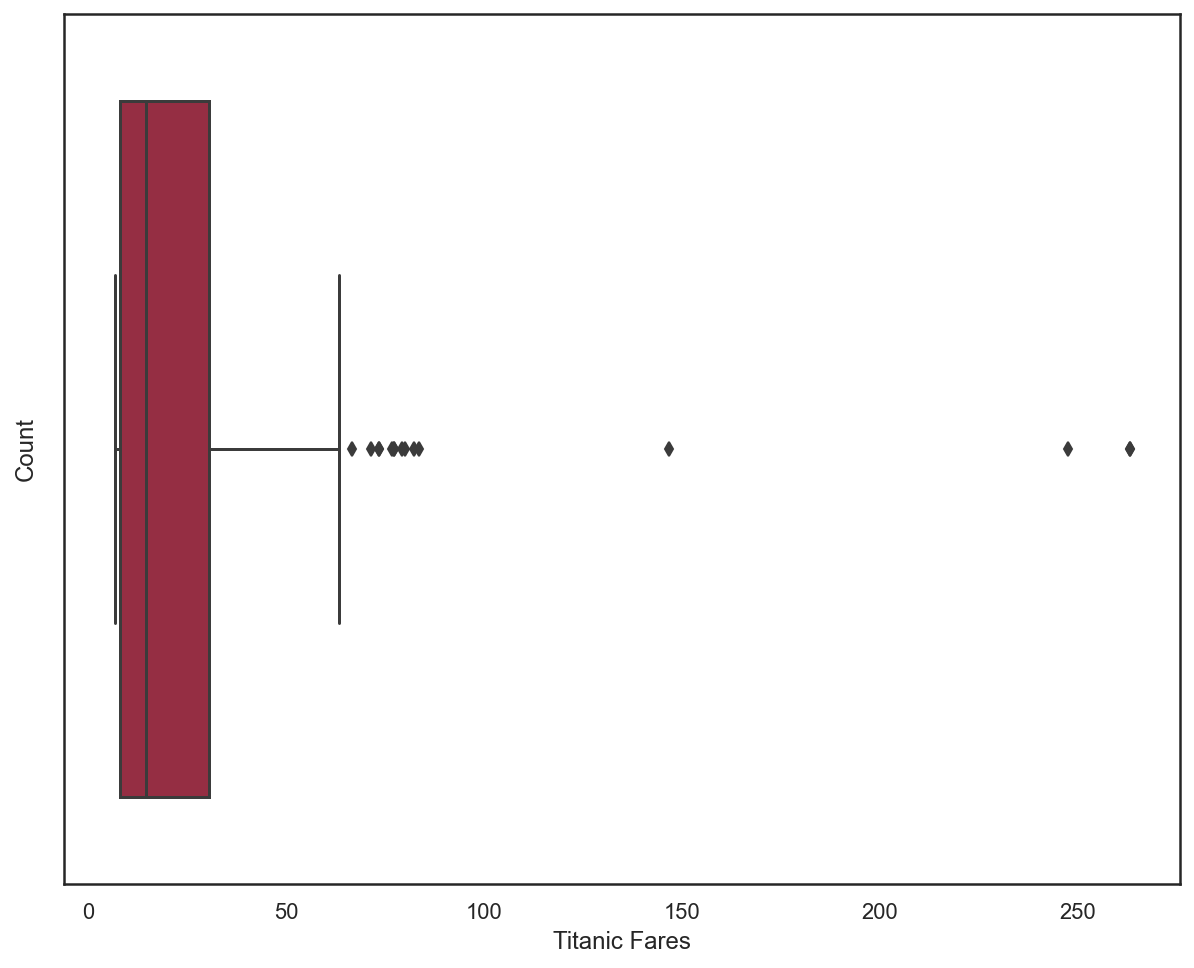

In [50]:
overview(titanic_df,titanic_df["Fare"],kde=True,boxplot = True,xlabel = "Titanic Fares");

Visualization of the relation between three variables


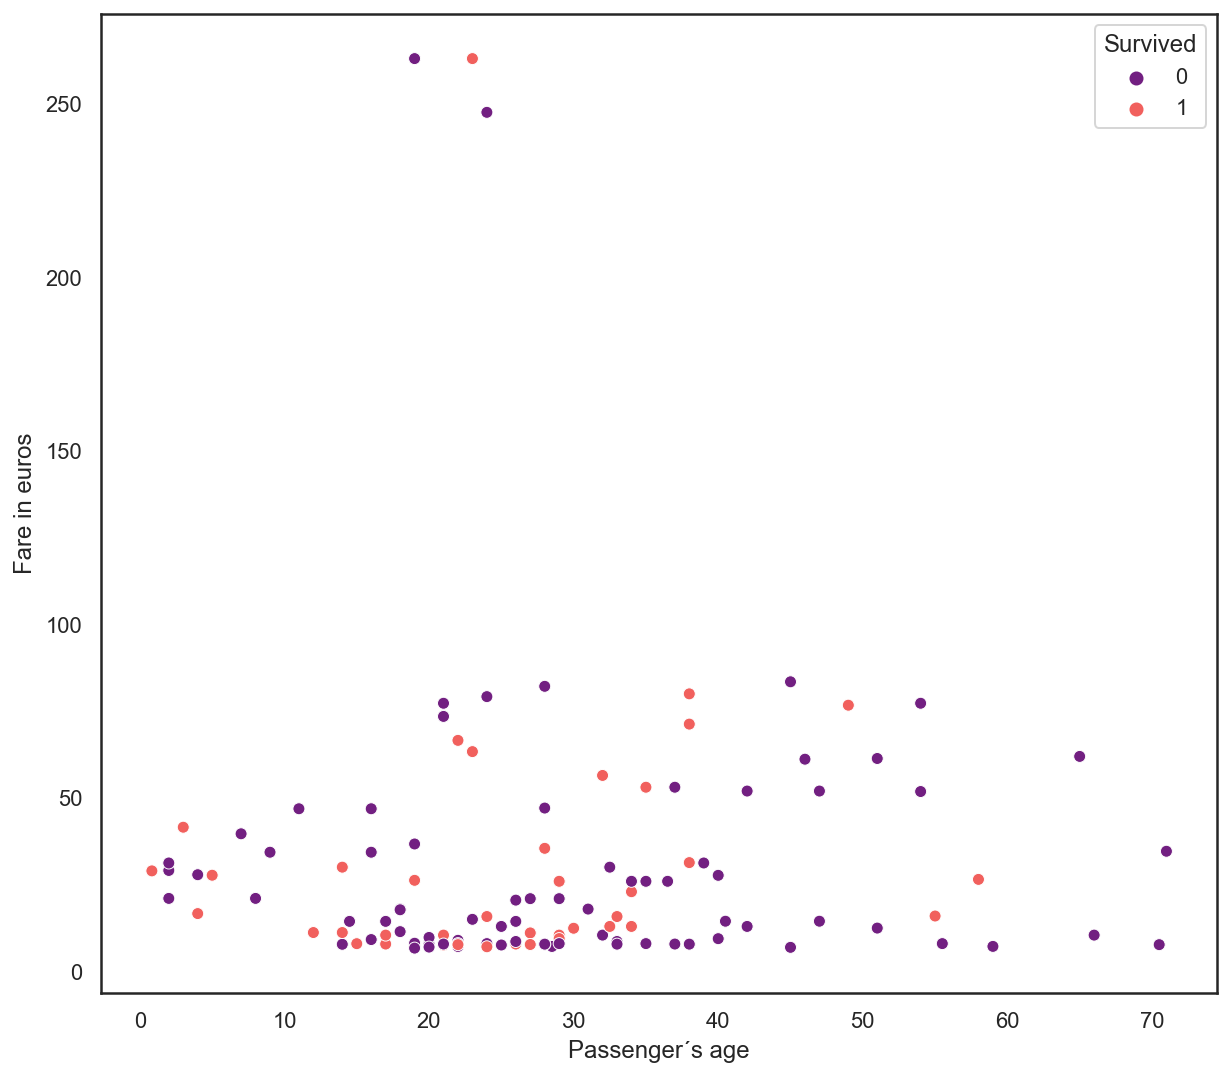

In [51]:
overview(titanic_df,titanic_df["Age"],titanic_df["Fare"],hue = "Survived",palette = "magma",xlabel = "Passenger´s age", ylabel = "Fare in euros");